### https://www.kaggle.com/c/tmdb-box-office-prediction

In [87]:
import pandas as pd 
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import mean_squared_log_error


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
#def rmsle_score(y, y0):
#    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

In [88]:
train = pd.read_csv('TMDB_Box_Office/train.csv')
test = pd.read_csv('TMDB_Box_Office/test.csv')

In [86]:
train.head(20)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Keywords,cast,crew,revenue,has_collection,collection_name,genres_ids,genres_count,log_revenue,log_budget
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,Hot Tub Time Machine Collection,[35],1.0,16.326300,16.454568
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,The Princess Diaries Collection,"[35, 18, 10751, 10749]",4.0,18.370959,17.504390
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,[18],1.0,16.387512,15.009433
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,"[53, 18]",2.0,16.588099,13.997833
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0,"[28, 53]",2.0,15.182615,0.000000
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,0,0,"[16, 12, 10751]",3.0,14.997740,15.894952
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,0,0,"[27, 53]",2.0,18.263396,16.454568
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0,0,[99],1.0,14.765821,0.000000
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,1,The Muppet Collection,"[28, 35, 10402, 10751, 12]",5.0,17.351454,0.000000
9,10,NaN,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,...,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de

In [5]:
train.shape, test.shape

((3000, 23), (4398, 22))

### belongs_to_collection

In [6]:
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 nan
3 nan
4 nan


In [7]:
#2396 values in this column are empty, 604 contrain information about the collections
(~train['belongs_to_collection'].isna()).value_counts()
#(~train['belongs_to_collection'].isna()).apply(lambda x: np.where(x, 0, 1))
#train['has_collection'] = ~train['belongs_to_collection'].isna().astype()
#train['has_collection'] 
#train['belongs_to_collection'].apply(lambda x: '1' if x is np.NaN else '0')

False    2396
True      604
Name: belongs_to_collection, dtype: int64

In [9]:
#only collection name can be useful. Another possibly useful feature is the fact of belonging to a collection.


test['has_collection'] = test['belongs_to_collection'].apply(lambda x: 1 if x is not np.NaN else 0)
test['has_collection'] 

train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 1 if x is not np.NaN else 0)
train['has_collection'] 

0       1
1       1
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       0
10      1
11      1
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      1
20      0
21      1
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2970    0
2971    0
2972    0
2973    0
2974    1
2975    0
2976    0
2977    0
2978    0
2979    0
2980    0
2981    0
2982    0
2983    0
2984    1
2985    0
2986    0
2987    0
2988    0
2989    0
2990    0
2991    1
2992    0
2993    0
2994    0
2995    0
2996    0
2997    0
2998    0
2999    0
Name: has_collection, Length: 3000, dtype: int64

In [27]:
import re
def collection_name(value):
    if value is not np.NaN:
        value_ = value[1:-1]
        #print(value_)
        idx_1 = [m.start() for m in re.finditer(':', value_)]
        idx_2 = [m.start() for m in re.finditer(',', value_)]
        #print(idx_1)
        #print(idx_2)
        name = value_[idx_1[1]+3:idx_2[1]-1]
        #print(name)
        return name
    else:
         return np.NaN
    
    


In [91]:
train['collection_name']  = train['belongs_to_collection'].apply(lambda x: collection_name(x) if x is not np.NaN else 0)
train['collection_name'][:10]

0    Hot Tub Time Machine Collection
1    The Princess Diaries Collection
2                                  0
3                                  0
4                                  0
5                                  0
6                                  0
7                                  0
8              The Muppet Collection
9                                  0
Name: collection_name, dtype: object

### genres

In [29]:
for i, e in enumerate(train['genres'][:5]):
    print(i, e)
    

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [63]:
#Most of films have 2-3 genres and 5-6 genres are possible. 0 and 7 are outliers,
train['genres_ids'] = train['genres'].str.findall(r'\d+')
train['genres_ids'].apply(lambda x: len(x or []) if x is not np.NaN else 0).value_counts()


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres_ids, dtype: int64

In [92]:
train['genres_count'] = train['genres_ids'].str.len()
train['genres_count'][:10]

KeyError: 'genres_ids'

In [72]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x is not np.NaN else []).values)



TypeError: string indices must be integers

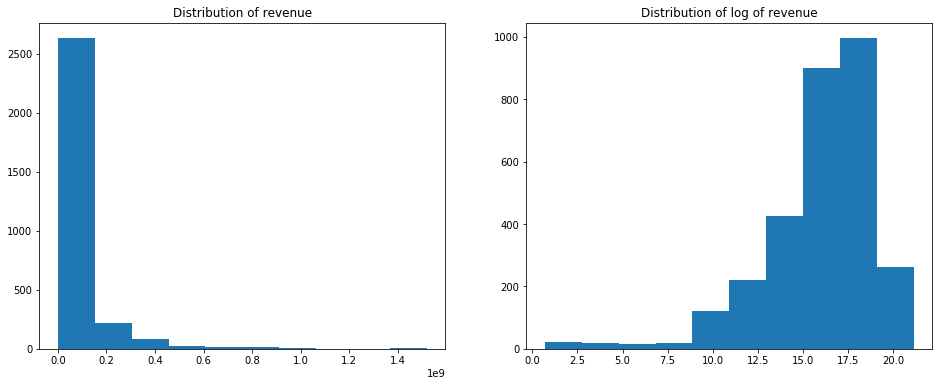

In [75]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

train['log_revenue'] = np.log1p(train['revenue'])

In [77]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

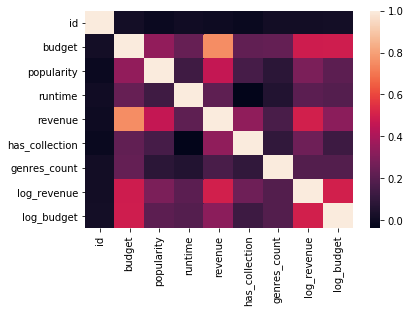

In [84]:
import seaborn as sns

# calculate the correlation matrix
corr = train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:


X = df.drop('revenue',axis=1)
y = df.revenue

X_train,X_test,y_train ,y_test = train_test_split(X,y,random_state = 42,train_size = 0.8,test_size=0.2)
X_train,X_test ,y_train ,y_test

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
scores = cross_val_score(lin_reg, X, y, cv = 5)
    

#scores = cross_val_score(lin_reg,X_train,y_train,cv =10,scoring=rmsle_score)
#scores,scores.mean(),scores.std()
